In [8]:
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#近海富营养化关键要素：溶解无机氮（DIN）、溶解无机磷（DIP）、溶解硅酸盐（DSi）、化学需氧量（COD）

In [155]:
#数据预处理与数据集拆分
data = pd.read_excel("data2015-2018浙江省实测富营养化参数数据.xlsx", sheet_name = 0)
data = data[['水深','总有机碳','溶解氧','盐度','硅酸盐','总氮','总磷','COD']]
data['富营养化指数']=list(map(lambda COD,DIN,DIP: COD*DIN*DIP*1000.0/4.5, data['COD'], data['总氮'],data['总磷']))
#data.info(null_counts= True) #没有null数据，但是有值为负数的错误数据
data_positive = data[data.select_dtypes(include=[np.number]).ge(0).all(1)] #删除所有带负值的行
#data_positive.info(null_counts= True)
#70%为训练集，30%为验证集
train = data_positive[0:int(data_positive.shape[0]*0.7)]
test = data_positive[int(data_positive.shape[0]*0.7)+1:]

x_train = train[['水深','溶解氧','盐度']].to_numpy()
y_train = np.array(train['富营养化指数'])

x_test = test[['水深','溶解氧','盐度']].to_numpy()
y_real = np.array(test['富营养化指数'])

In [166]:
#初始化SVR
svr = SVR(
    kernel ='rbf',
    gamma =0.1,
    tol = 0.001,
    C = 60000,
    epsilon = 100
)
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)
print(r2_score(y_real,y_pred))

0.4075326542949652


In [167]:
print(r2_score(y_real,y_pred))

0.4075326542949652


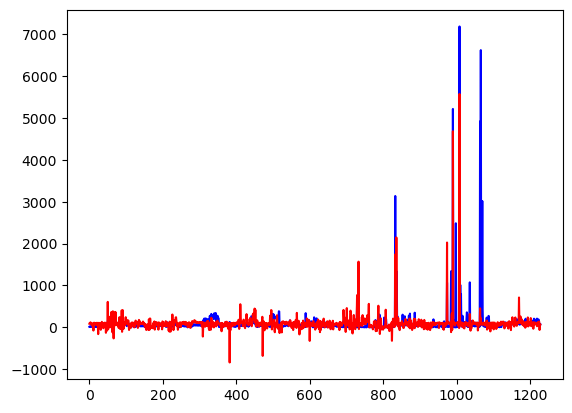

In [170]:
plt.plot(list(range(0,y_real.size)), y_real, color = 'blue')
plt.plot(list(range(0,y_pred.size)), y_pred, color = 'red')
plt.show()